<a href="https://colab.research.google.com/github/HajungKim0804/data20222_15/blob/main/15_bs_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 시각화

In [ ]:
#한글 폰트 사용설치
%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum

The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 155680 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

import seaborn as sns

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

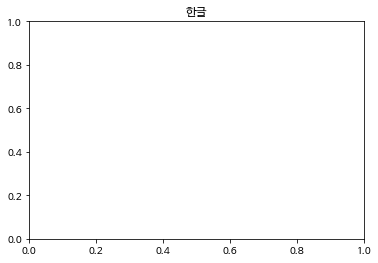

In [ ]:
plt.title('한글')
plt.show()

🏷️ **웹 동작원리**


---
<img src ='https://drive.google.com/uc?export=view&id=1amZ78fUnfp3o5Q1XVKDG3eAAzKaYlPrp'>

---

# Beautiful Soup 모듈
+ HTML 및 XML 문서 를 구문 분석하기 위한 Python 패키지
+ DOM 추출
+ 기본적으로 UTF-8 인코딩 방식이지만 CP949도 지원

🏷️ **웹 스크래핑(Web Scraping)과 웹 크롤링(Web Crawling)**


---
+ 웹 스크래핑(Web Scraping) : 웹 사이트 상에서 원하는 정보를 추출하는 기술
+ 웹 크롤링(Web Crawling) : 웹 크롤러(자동화봇)가정해진 규칙에 따라 웹 페이지를 수집해서 각 사이트의 정보를 분류하는 기술




---




## BeautifulSoup 모듈을 활용한 스크래핑

### 1. 웹 페이지 가져오기

In [ ]:
from urllib.request import urlopen

url = 'http://kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.xml?key=f5eef3421c602c6cb7ea224104795888&targetDt=20220801'
webpage = urlopen(url).read().decode()
webpage

'<?xml version="1.0" encoding="utf-8" standalone="yes"?><boxOfficeResult><boxofficeType>일별 박스오피스</boxofficeType><showRange>20220801~20220801</showRange><dailyBoxOfficeList><dailyBoxOffice><rnum>1</rnum><rank>1</rank><rankInten>0</rankInten><rankOldAndNew>OLD</rankOldAndNew><movieCd>20209343</movieCd><movieNm>한산: 용의 출현</movieNm><openDt>2022-07-27</openDt><salesAmt>3864072934</salesAmt><salesShare>57.6</salesShare><salesInten>-3179478687</salesInten><salesChange>-45.1</salesChange><salesAcc>27258416626</salesAcc><audiCnt>385984</audiCnt><audiInten>-269717</audiInten><audiChange>-41.1</audiChange><audiAcc>2656081</audiAcc><scrnCnt>2019</scrnCnt><showCnt>9636</showCnt></dailyBoxOffice><dailyBoxOffice><rnum>2</rnum><rank>2</rank><rankInten>0</rankInten><rankOldAndNew>OLD</rankOldAndNew><movieCd>20205362</movieCd><movieNm>미니언즈2</movieNm><openDt>2022-07-20</openDt><salesAmt>904002128</salesAmt><salesShare>13.5</salesShare><salesInten>-338388861</salesInten><salesChange>-27.2</salesChange><sal

### 2. BeautifulSoup 객체 생성

```python
from bs4 import BeautifulSoup as bs

인스턴스명 = BeautifulSoup(markup, parser)
```
* 첫 번째 인자 : HTML 형식의 문자열
* 두 번째 인자 : 첫 번째 인자의 문자열을 해석하기 위한 파서

  * **파서(parser) 종류**
    + html.parser : 파이썬 표준 라이브러리에 포함된 파서로 빠르지만 유연하지 않기 때문에 단순한 HTML문서에 사용

        ```
        BeautifulSoup(markup, "html.parser")
        ```

    + lxml : 매우 빠르고 유연하지만 외부 의존
      - lxml의 HTML 파서
          ```
          BeautifulSoup(markup, "lxml")
          ```
      - lxml의 XML 파서
          ```
          BeautifulSoup(markup, "lxml-xml")
          ```

    + html5lib : 웹 브라우저와 동일한 방식으로 페이지 구문 분석하는 파서로 매우 느리지만 매우 유연하지만 외부 의존
        ```
        BeautifulSoup(markup, "html5lib")
      ```

In [ ]:
from bs4 import BeautifulSoup as bs

In [ ]:
box_xml =  bs(webpage,'lxml')
type(box_xml)

bs4.BeautifulSoup

### 3. **Beautiful Soup 파싱 메소드**
+ 태그명
  + **.find(태그명)** : 조건에 맞는 태그 1개만 찾음
  + **.find_all(태그명)** : 조건에 맞는 모든 태그 찾음
+ css선택자
  + **.select_one(선택자)** : 조건에 맞는 CSS선택자 1개만 찾음
  + **.select(선택자)** : 조건에 맞는 CSS선택자 찾음

In [ ]:
box_xml

<?xml version="1.0" encoding="utf-8" standalone="yes"?><html><body><boxofficeresult><boxofficetype>일별 박스오피스</boxofficetype><showrange>20220801~20220801</showrange><dailyboxofficelist><dailyboxoffice><rnum>1</rnum><rank>1</rank><rankinten>0</rankinten><rankoldandnew>OLD</rankoldandnew><moviecd>20209343</moviecd><movienm>한산: 용의 출현</movienm><opendt>2022-07-27</opendt><salesamt>3864072934</salesamt><salesshare>57.6</salesshare><salesinten>-3179478687</salesinten><saleschange>-45.1</saleschange><salesacc>27258416626</salesacc><audicnt>385984</audicnt><audiinten>-269717</audiinten><audichange>-41.1</audichange><audiacc>2656081</audiacc><scrncnt>2019</scrncnt><showcnt>9636</showcnt></dailyboxoffice><dailyboxoffice><rnum>2</rnum><rank>2</rank><rankinten>0</rankinten><rankoldandnew>OLD</rankoldandnew><moviecd>20205362</moviecd><movienm>미니언즈2</movienm><opendt>2022-07-20</opendt><salesamt>904002128</salesamt><salesshare>13.5</salesshare><salesinten>-338388861</salesinten><saleschange>-27.2</sales

In [ ]:
#날짜 가져오기
showrange = box_xml.find('showrange').text[:8]
showrange

'20220801'

In [ ]:
#박스오피스 
dailyboxoffices = box_xml.find_all('dailyboxoffice') 
type(dailyboxoffices)

bs4.element.ResultSet

In [ ]:
for item in dailyboxoffices:
  line = f'{item.find("rank").text},{item.find("movienm").text},{item.find("salesamt").text},{item.find("audicnt").text}\n'
  print(line)

1,한산: 용의 출현,3864072934,385984

2,미니언즈2,904002128,97208

3,탑건: 매버릭,731076809,71491

4,뽀로로 극장판 드래곤캐슬 대모험,370464938,40778

5,외계+인 1부,404644694,40373

6,헤어질 결심,190364696,18220

7,명탐정 코난: 할로윈의 신부,76210417,7471

8,비상선언,73157300,4885

9,헌트,36423000,4047

10,토르: 러브 앤 썬더,12191860,1081



In [ ]:
# 1. open API 주소 생성
apikey = 'HBEKinfNgHtYKTnrWmyyeMan3%2FFUmBf9y8X2jFixL3ELjIe%2FbUykfiUfomDQWO6deIlBoTq9F3YH0vUq%2FmSfUA%3D%3D'
url = 'http://apis.data.go.kr/B553734/iseelectricprod/getElectricProduction?'
url = url + 'serviceKey=' + apikey
url = url + '&returnType=xml'
url = url + '&numOfRows=12&pageNo=1'
url = url + '&startDate=2022-01'

url

'http://apis.data.go.kr/B553734/iseelectricprod/getElectricProduction?serviceKey=HBEKinfNgHtYKTnrWmyyeMan3%2FFUmBf9y8X2jFixL3ELjIe%2FbUykfiUfomDQWO6deIlBoTq9F3YH0vUq%2FmSfUA%3D%3D&returnType=xml&numOfRows=12&pageNo=1&startDate=2022-01'

In [ ]:
webpage = urlopen(url).read().decode()
webpage

'<?xml version="1.0" encoding="UTF-8"?>\n<response><header><resultCode>00</resultCode><description>서울에너지공사 발전소 월별 전기생산량(발전량)</description><resultMsg>NORMAL CODE</resultMsg></header><body><pageNo>1</pageNo><totalCount>12</totalCount><items><item><unit>kWh</unit><elecprodqty>0.00</elecprodqty><dates>2022-06</dates><branchNm>동부지사</branchNm><branchCd>2</branchCd></item><item><unit>kWh</unit><elecprodqty>0.00</elecprodqty><dates>2022-06</dates><branchNm>서부지사</branchNm><branchCd>1</branchCd></item><item><unit>kWh</unit><elecprodqty>1807800.00</elecprodqty><dates>2022-05</dates><branchNm>동부지사</branchNm><branchCd>2</branchCd></item><item><unit>kWh</unit><elecprodqty>2485647.50</elecprodqty><dates>2022-05</dates><branchNm>서부지사</branchNm><branchCd>1</branchCd></item><item><unit>kWh</unit><elecprodqty>3009200.00</elecprodqty><dates>2022-04</dates><branchNm>동부지사</branchNm><branchCd>2</branchCd></item><item><unit>kWh</unit><elecprodqty>7980470.00</elecprodqty><dates>2022-04</dates><branchNm>서부지사</b

In [ ]:
elec_xml =  bs(webpage,'lxml')
type(elec_xml)

bs4.BeautifulSoup

In [ ]:
elec_xml

<?xml version="1.0" encoding="UTF-8"?><html><body><response><header><resultcode>00</resultcode><description>서울에너지공사 발전소 월별 전기생산량(발전량)</description><resultmsg>NORMAL CODE</resultmsg></header><pageno>1</pageno><totalcount>12</totalcount><items><item><unit>kWh</unit><elecprodqty>0.00</elecprodqty><dates>2022-06</dates><branchnm>동부지사</branchnm><branchcd>2</branchcd></item><item><unit>kWh</unit><elecprodqty>0.00</elecprodqty><dates>2022-06</dates><branchnm>서부지사</branchnm><branchcd>1</branchcd></item><item><unit>kWh</unit><elecprodqty>1807800.00</elecprodqty><dates>2022-05</dates><branchnm>동부지사</branchnm><branchcd>2</branchcd></item><item><unit>kWh</unit><elecprodqty>2485647.50</elecprodqty><dates>2022-05</dates><branchnm>서부지사</branchnm><branchcd>1</branchcd></item><item><unit>kWh</unit><elecprodqty>3009200.00</elecprodqty><dates>2022-04</dates><branchnm>동부지사</branchnm><branchcd>2</branchcd></item><item><unit>kWh</unit><elecprodqty>7980470.00</elecprodqty><dates>2022-04</dates><branchnm>서부지사

In [ ]:
items = elec_xml.find_all('item')
items

[<item><unit>kWh</unit><elecprodqty>0.00</elecprodqty><dates>2022-06</dates><branchnm>동부지사</branchnm><branchcd>2</branchcd></item>,
 <item><unit>kWh</unit><elecprodqty>0.00</elecprodqty><dates>2022-06</dates><branchnm>서부지사</branchnm><branchcd>1</branchcd></item>,
 <item><unit>kWh</unit><elecprodqty>1807800.00</elecprodqty><dates>2022-05</dates><branchnm>동부지사</branchnm><branchcd>2</branchcd></item>,
 <item><unit>kWh</unit><elecprodqty>2485647.50</elecprodqty><dates>2022-05</dates><branchnm>서부지사</branchnm><branchcd>1</branchcd></item>,
 <item><unit>kWh</unit><elecprodqty>3009200.00</elecprodqty><dates>2022-04</dates><branchnm>동부지사</branchnm><branchcd>2</branchcd></item>,
 <item><unit>kWh</unit><elecprodqty>7980470.00</elecprodqty><dates>2022-04</dates><branchnm>서부지사</branchnm><branchcd>1</branchcd></item>,
 <item><unit>kWh</unit><elecprodqty>9217900.00</elecprodqty><dates>2022-03</dates><branchnm>동부지사</branchnm><branchcd>2</branchcd></item>,
 <item><unit>kWh</unit><elecprodqty>5849090.50

In [ ]:
for item in items:
  line = f'{item.find("dates").text},{item.find("elecprodqty").text},{item.find("branchnm").text}\n'
  print(line)

2022-06,0.00,동부지사

2022-06,0.00,서부지사

2022-05,1807800.00,동부지사

2022-05,2485647.50,서부지사

2022-04,3009200.00,동부지사

2022-04,7980470.00,서부지사

2022-03,9217900.00,동부지사

2022-03,5849090.50,서부지사

2022-02,9113300.00,동부지사

2022-02,8757266.00,서부지사

2022-01,12911900.00,동부지사

2022-01,8964872.00,서부지사



---

# **해결문제**

뉴스 사이트에서 댓글수가 평균 댓글보다 많은 뉴스를 찾아보시오

---

🏷️ **HTML과 CSS**


---



+ **HTML(Hyper Text Markup Language)**
  + 웹페이지 상에서 문단, 제목, 표, 이미지, 동영상 등을 정의하고 웹페이지 내용을 구조화하고 의미를 부여하는 마크업 언어
+ **CSS(Cascading Style Sheet)**
  + 색상, 레이아웃 및 글꼴등 웹페이지의 디자인 요소를 담당하는 선언형 언어로 스타일 시트(Style Sheet)라고도 하고, HTML로 작성된 웹페이지를 보기 좋게 꾸며주는 스타일 규칙 언어

+ 참고 사이트 : <https://www.w3schools.com/>


---



In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs

In [ ]:
#1.웹 페이지 가져오기
url =  'https://media.naver.com/press/214'
webpage =  urlopen(url).read().decode()
webpage

'<!doctype html>\n<html lang="ko">\n\t<head>\n\t\t<title id="browserTitleArea">\n\n\nMBC :: 네이버뉴스\n</title>\n\t\t\n\n\n<script>\n\tfunction isMobileDevice() {\n\t\treturn /^.*(iPhone|iPod|iPad|Android).*/.test(navigator.userAgent);\n\t}\n</script>\n<script>\n\t(function () {\n\t\ttry {\n\t\t\tif (isMobileDevice() && isAbleApplyPrefersColorScheme()) {\n\t\t\t\t\n\t\t\t\tdocument.querySelector("html").classList.add("DARK_THEME");\n\t\t\t}\n\t\t} catch(e) {}\n\n\t\tfunction isAbleApplyPrefersColorScheme() {\n\t\t\t\n\t\t\tif (window.matchMedia("(prefers-color-scheme)").matches === false) {\n\t\t\t\treturn false;\n\t\t\t}\n\n\t\t\tvar userAgent = navigator.userAgent;\n\n\t\t\tif (userAgent.indexOf("NAVER") > -1) {\n\t\t\t\t\n\t\t\t\tif (/.*NAVER\\([a-zA-Z]*;\\s[a-zA-Z]*;\\s([0-9]*);/.test(userAgent)) {\n\t\t\t\t\treturn Number(RegExp.$1) >= 1000;\n\t\t\t\t}\n\t\t\t} else {\n\t\t\t\t\n\t\t\t\treturn document.cookie.indexOf("NSCS=1") > -1;\n\t\t\t}\n\n\t\t\treturn false;\n\t\t}\n\t})();\n</s

In [ ]:
#2. BeautifulSoup 객체 생성
html =  bs(webpage,'html.parser')

In [ ]:
div = html.find('div')
div

<div class="u_skip"><a href="#ct">본문 바로가기</a></div>

In [ ]:
div2  = html.select_one('div')
div2

<div class="u_skip"><a href="#ct">본문 바로가기</a></div>

In [ ]:
div2  = html.select_one('.u_skip').text
div2

'본문 바로가기'

In [ ]:
#3. 파싱하기
lis =  html.select('.ofra_list > li')
type(lis)

list

In [ ]:
lis[0]

<li class="ofra_list_item as_thumb">
<a class="ofra_list_item_link _es_pc_link" data-pc-link="" href="https://n.news.naver.com/article/214/0001214446?ntype=RANKING" onclick="nclk(event, 'hom.renws', '', '')">
<div class="ofra_list_img">
<div class="ofra_list_img_inner">
<img alt="" data-src="https://mimgnews.pstatic.net/image/origin/214/2022/08/09/1214446.jpg?type=nf176_176&amp;ut=1660009080000" height="88" onerror="showNoImage(this)" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" width="88"/>
</div>
</div>
<div class="ofra_list_txwrap">
<i class="ofra_list_num">1</i>
<div class="ofra_list_tx">
<div class="ofra_list_tx_headline">고민정 "윤 대통령, 폭우로 고립돼 자택서 전화지시‥할 일 한건가?"</div>
<div class="ofra_list_tx_date">4시간전</div>
<div class="ofra_list_tx_visit">
<span class="blind">조회수</span>
                                                                29,707
                                                            </div>
</div>
</div>
</a>
</li>

In [ ]:
for item in lis : 
  print(item)

<li class="ofra_list_item as_thumb">
<a class="ofra_list_item_link _es_pc_link" data-pc-link="" href="https://n.news.naver.com/article/214/0001214446?ntype=RANKING" onclick="nclk(event, 'hom.renws', '', '')">
<div class="ofra_list_img">
<div class="ofra_list_img_inner">
<img alt="" data-src="https://mimgnews.pstatic.net/image/origin/214/2022/08/09/1214446.jpg?type=nf176_176&amp;ut=1660009080000" height="88" onerror="showNoImage(this)" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" width="88"/>
</div>
</div>
<div class="ofra_list_txwrap">
<i class="ofra_list_num">1</i>
<div class="ofra_list_tx">
<div class="ofra_list_tx_headline">고민정 "윤 대통령, 폭우로 고립돼 자택서 전화지시‥할 일 한건가?"</div>
<div class="ofra_list_tx_date">4시간전</div>
<div class="ofra_list_tx_visit">
<span class="blind">조회수</span>
                                                                29,707
                                                            </div>
</div>
</div>
</a>
</li>
<li class="

In [ ]:
num = lis[0].select_one(".ofra_list_tx_visit").text
num = int(num.replace('조회수','').replace(',',''))
num

29707

In [ ]:
for item in lis[10:] : 
  num = item.select_one(".ofra_list_tx_comment").text
  num = int(num.replace('댓글','').replace(',',''))
  line = f'{item.find("i").text},{item.select_one(".ofra_list_tx_headline").text},{num}'
  print(line)

1,고민정 "윤 대통령, 폭우로 고립돼 자택서 전화지시‥할 일 한건가?",1747
2,윤 대통령 "각별한 경계심으로 상황 끝까지 챙기겠다‥현장점검 나설 것",567
3,윤 대통령, 재난안전상황실에서 호우 상황 점검 긴급회의 주재,305
4,"내 논문 100% 표절"‥국민대 교수들 반발,205
5,교육부 차관 "만 5세 초등입학, 현실적으로 추진 어려워져",196
6,대통령실, 尹 자택 고립 논란에 "현장 역량 떨어뜨릴까 집에서 전화 지시",192
7,국민의힘 전국위, 당헌 개정안 의결‥비대위 전환 확정,128
8,70년대 팝스타 올리비아 뉴턴 존, 암 투병 끝에 별세,91
9,권성동 "호우피해 깊은 위로‥재난 취약계층 비상조치 필요",45
10,이철규, 이준석 향해 "징계 땐 법적대응 '못해'‥억울하면 그때 했어야",38


In [ ]:
def newsDay(d) :
  url = "https://media.naver.com/press/214/ranking?type=comment&date=" +  d
  wp = urlopen(url).read().decode()
  html = bs(wp, 'html.parser')
  lis = html.select('.press_ranking_list > li')

  lines = ''
  for item in lis :
    num = int(item.select_one(".list_comment").text.replace('댓글','').replace(',', ''))
    title = item.select_one(".list_title").text.replace('"','').replace(",",'')    ## 중요!! 
    line = f'{d[:4]}-{d[4:6]}-{d[6:]}, {item.select_one(".list_ranking_num").text},{title},{num} \n'
    lines = lines + line

  return lines 

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/news.csv', 'w') as fp :
  fp.write('날짜,순위,기사,댓글수\n')

with open('/content/drive/MyDrive/Colab Notebooks/news.csv', 'a') as fp :
  for i in range(1, 10) :
    d = '202208' + f'{i:02d}'

    lines = newsDay(d)
    print(lines)
    fp.write(lines)

2022-08-01, 1,박순애 초교 입학연령 1개월씩 12년간 앞당기는 방안도 가능,3046 
2022-08-01, 2,윤 대통령 지지율 28.9%‥갤럽 이어 KSOI도 30% 아래로,1207 
2022-08-01, 3,대통령실 드릴 말씀 없다‥윤 대통령 휴가,1179 
2022-08-01, 4,박순애 만5세 입학 합의 도출‥4년간 5개 학년 입학 확정 아냐,935 
2022-08-01, 5,권영세 장관 탈북민 전원수용 원칙 윤 대통령께 건의할것,886 
2022-08-01, 6,김건희 'yuji 논문' 등 연구 부정 아니다‥학위 유지,821 
2022-08-01, 7,李 국방 BTS 입대하는 게 오히려 인기에 도움,696 
2022-08-01, 8,[스트레이트] '투고 금지' 또 나왔는데‥박순애 장관의 끝없는 거짓말,696 
2022-08-01, 9,'거짓말' 안 통하자 입 닫았나‥박순애 이번엔 묵묵부답,641 
2022-08-01, 10,윤 대통령 여름휴가 서울에 머물기로‥코로나·치안·물가 챙겨달라,590 
2022-08-01, 11,대통령실 윤 대통령 많이 자고 일은 덜 하고 푹 쉬고 있는 상태,519 
2022-08-01, 12,윤 대통령 자택에서 휴가‥대통령실 쇄신은 근거 없는 얘기,465 
2022-08-01, 13,갑작스런 '5세 입학'에 시위 잇따라‥졸속 정책 파기하라,448 
2022-08-01, 14,정미경 순번 정해 놓고 사퇴 이준석 내쫓으려 하는구나,431 
2022-08-01, 15,57만 명 투표했지만‥어뷰징에 무산된 국민제안,359 
2022-08-01, 16,안보 구멍 경천동지할 일‥통신 끊긴 구축함 왜 보고 안 했나,332 
2022-08-01, 17,한동훈 검찰 수사 역량 국민 자산 신속히 습득해야,270 
2022-08-01, 18,'만 5세 초등학교 입학'‥학제개편안 놓고 커지는 논란,254 
2022-08-01, 19,[단독] 윤 대통령 경찰청장 청문보고서 5일까지‥민주 청문회 무력화 시도,242 
2022-08-01, 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/news.csv')
df

,날짜,순위,기사,댓글수
0,2022-08-01,1,박순애 초교 입학연령 1개월씩 12년간 앞당기는 방안도 가능,3046
1,2022-08-01,2,윤 대통령 지지율 28.9%‥갤럽 이어 KSOI도 30% 아래로,1207
2,2022-08-01,3,대통령실 드릴 말씀 없다‥윤 대통령 휴가,1179
3,2022-08-01,4,박순애 만5세 입학 합의 도출‥4년간 5개 학년 입학 확정 아냐,935
4,2022-08-01,5,권영세 장관 탈북민 전원수용 원칙 윤 대통령께 건의할것,886
...,...,...,...,...
175,2022-08-09,16,늘어나는 '재감염'‥주간 확진자 중 5∼6%로 급증,17
176,2022-08-09,17,민주 내일 김건희 관저 의혹 국정조사 요구서 제출,13
177,2022-08-09,18,박순애 장관 자진사퇴‥취임 35일 만,10
178,2022-08-09,19,윤 대통령 시작도 국민·방향도 국민·목표도 국민‥국민에 공감 구해야,9


In [ ]:
df['날짜'] = pd.to_datetime(df['날짜'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      180 non-null    datetime64[ns]
 1   순위      180 non-null    int64         
 2   기사      180 non-null    object        
 3   댓글수     180 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 5.8+ KB


In [ ]:
#df['요일'] = df['날짜'].dt.day_name()
df['요일'] = df['날짜'].dt.weekday
df.head()

,날짜,순위,기사,댓글수,요일
0,2022-08-01,1,박순애 초교 입학연령 1개월씩 12년간 앞당기는 방안도 가능,3046,0
1,2022-08-01,2,윤 대통령 지지율 28.9%‥갤럽 이어 KSOI도 30% 아래로,1207,0
2,2022-08-01,3,대통령실 드릴 말씀 없다‥윤 대통령 휴가,1179,0
3,2022-08-01,4,박순애 만5세 입학 합의 도출‥4년간 5개 학년 입학 확정 아냐,935,0
4,2022-08-01,5,권영세 장관 탈북민 전원수용 원칙 윤 대통령께 건의할것,886,0


In [ ]:
wlt = {0:'월', 1:'화', 2 : '수',3 : '목',4:'금',5:'토',6:'일'}
df['요일명'] = df['요일'].map(wlt)

In [ ]:
df.groupby('요일명').mean()[['댓글수']]

,댓글수
요일명,
금,617.200
목,433.250
수,437.250
월,664.025
일,279.150
토,499.500
화,429.150


In [ ]:
import seaborn as sns

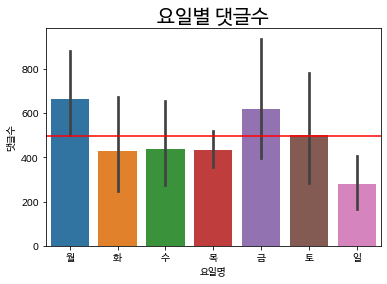

In [ ]:
sns.barplot( x= '요일명', y = '댓글수', data = df)
plt.axhline(y = df['댓글수'].mean(), color = 'r')
plt.title('요일별 댓글수', fontsize = 20)
plt.show()